In [5]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [6]:
huggingface_dataset_name = "knkarthick/dialogsum"
dataset = load_dataset(huggingface_dataset_name)
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 12460
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 500
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 1500
    })
})

In [8]:
df_train = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])
df_valid = pd.DataFrame(dataset['validation'])

In [12]:
# 1. Dataset Overview
print("Dataset Overview:")
print(df_train.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12460 entries, 0 to 12459
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        12460 non-null  object
 1   dialogue  12460 non-null  object
 2   summary   12460 non-null  object
 3   topic     12460 non-null  object
dtypes: object(4)
memory usage: 389.5+ KB
None


In [13]:
print(df_train.describe())

             id                                           dialogue  \
count     12460                                              12460   
unique    12460                                              12458   
top     train_0  #Person1#: I'm searching for an old music box....   
freq          1                                                  2   

                                                  summary     topic  
count                                               12460     12460  
unique                                              12436      7434  
top     #Person1# is surprised at Taylor whose hobbies...  shopping  
freq                                                    2       174  


In [14]:
# 2. Missing Values
print("\nMissing Values:")
print(df_train.isnull().sum())


Missing Values:
id          0
dialogue    0
summary     0
topic       0
dtype: int64


In [17]:
# 3. Distribution of Topics (Top 20)
topic_counts = df_train['topic'].value_counts().head(20)  # Select the top 20 topics
print("\nTop 20 Topic Distribution:")
print(topic_counts)


Top 20 Topic Distribution:
topic
shopping               174
job interview          161
daily casual talk      125
phone call              89
order food              79
interview               77
social meeting          56
business talk           48
see a doctor            46
weather                 42
daily talk              38
invitation              36
social casual talk      35
ask for information     34
ask for directions      33
go shopping             33
check in                31
take a taxi             29
weekend plan            28
make an appointment     28
Name: count, dtype: int64


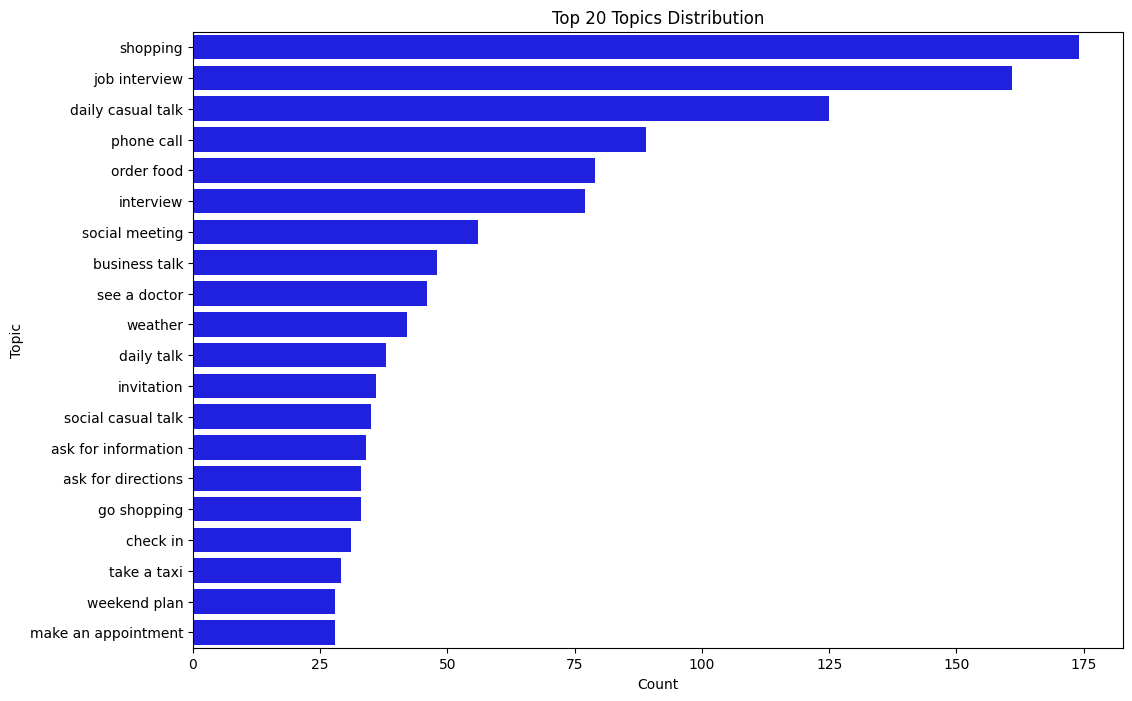

In [24]:
# Plot Top 20 Topic Distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=topic_counts.values, y=topic_counts.index, orient='h', color='blue')
plt.title('Top 20 Topics Distribution')
plt.xlabel('Count')
plt.ylabel('Topic')
plt.show()


In [25]:
# 4. Text Analysis for Dialogue and Summary
df_train['dialogue_word_count'] = df_train['dialogue'].apply(lambda x: len(str(x).split()))
df_train['summary_word_count'] = df_train['summary'].apply(lambda x: len(str(x).split()))

print("\nDialogue Word Count Statistics:")
print(df_train['dialogue_word_count'].describe())

print("\nSummary Word Count Statistics:")
print(df_train['summary_word_count'].describe())


Dialogue Word Count Statistics:
count    12460.000000
mean       130.986998
std         70.976634
min         40.000000
25%         85.000000
50%        116.000000
75%        163.000000
max        985.000000
Name: dialogue_word_count, dtype: float64

Summary Word Count Statistics:
count    12460.000000
mean        22.867657
std         10.705946
min          5.000000
25%         15.000000
50%         21.000000
75%         28.000000
max        153.000000
Name: summary_word_count, dtype: float64


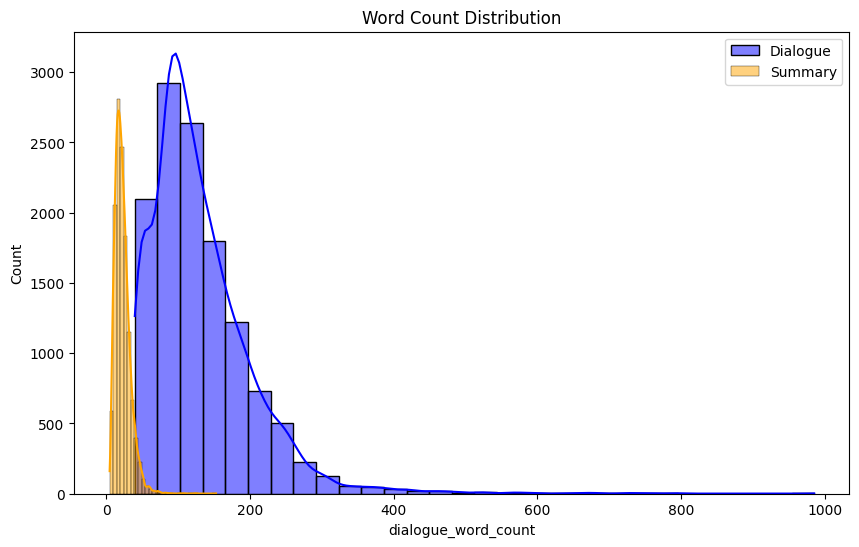

In [26]:
# Plot Word Count Distributions
plt.figure(figsize=(10, 6))
sns.histplot(df_train['dialogue_word_count'], kde=True, bins=30, color='blue', label='Dialogue')
sns.histplot(df_train['summary_word_count'], kde=True, bins=30, color='orange', label='Summary')
plt.title('Word Count Distribution')
plt.legend()
plt.show()

In [27]:
# 5. Sample Text Examination
print("\nSample Dialogues and Summaries:")
print(df_train[['dialogue', 'summary']].head())


Sample Dialogues and Summaries:
                                            dialogue  \
0  #Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. ...   
1  #Person1#: Hello Mrs. Parker, how have you bee...   
2  #Person1#: Excuse me, did you see a set of key...   
3  #Person1#: Why didn't you tell me you had a gi...   
4  #Person1#: Watsup, ladies! Y'll looking'fine t...   

                                             summary  
0  Mr. Smith's getting a check-up, and Doctor Haw...  
1  Mrs Parker takes Ricky for his vaccines. Dr. P...  
2  #Person1#'s looking for a set of keys and asks...  
3  #Person1#'s angry because #Person2# didn't tel...  
4  Malik invites Nikki to dance. Nikki agrees if ...  


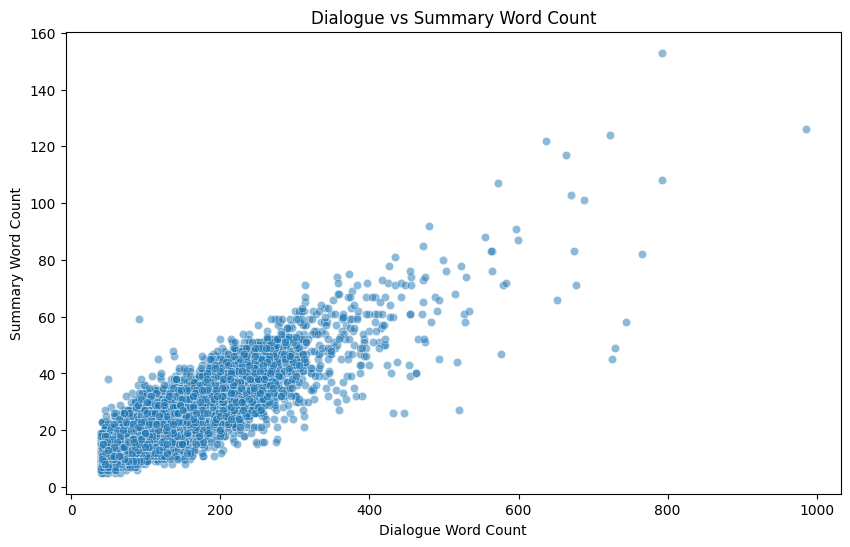

In [28]:
# 6. Relationship Between Word Counts
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='dialogue_word_count', y='summary_word_count', alpha=0.5)
plt.title('Dialogue vs Summary Word Count')
plt.xlabel('Dialogue Word Count')
plt.ylabel('Summary Word Count')
plt.show()

shopping


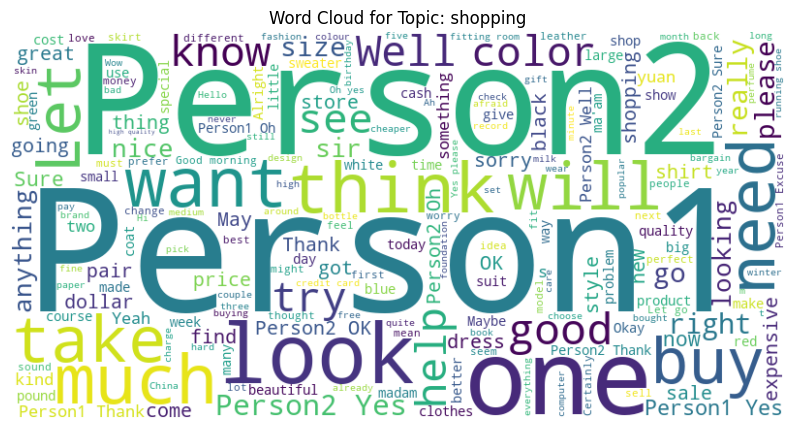

job interview


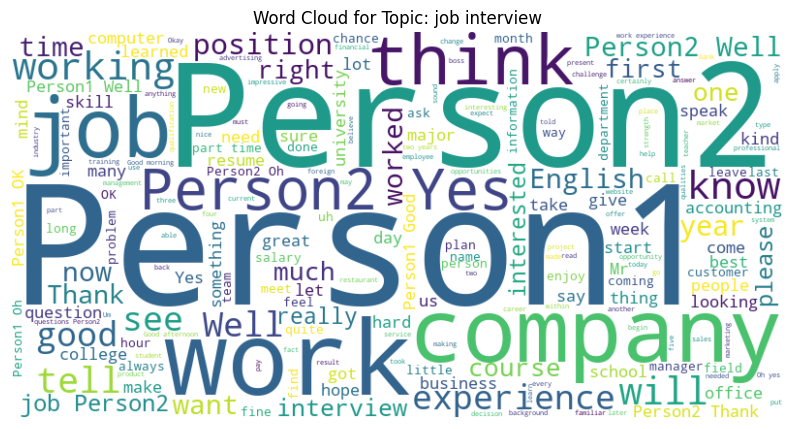

daily casual talk


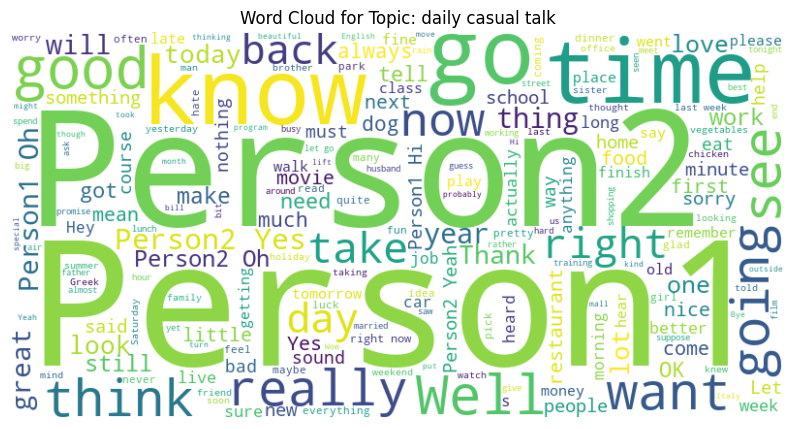

phone call


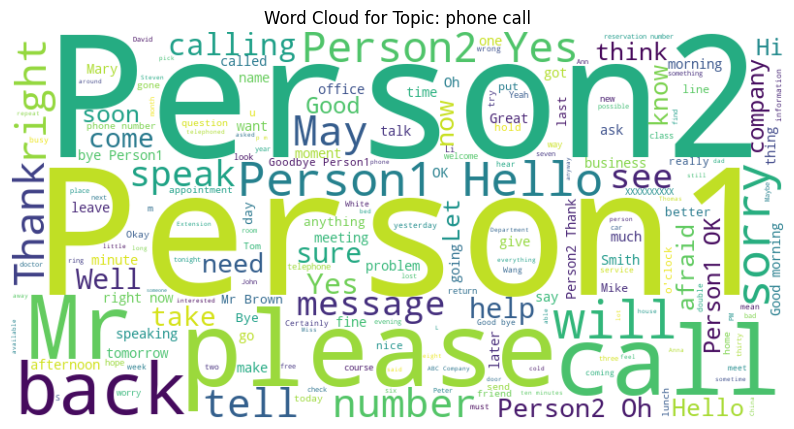

order food


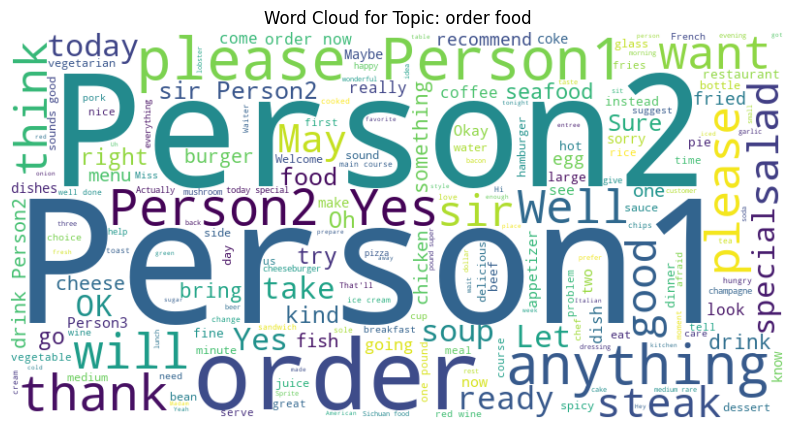

In [47]:
# 7. Analyze Common Words in Topics
from wordcloud import WordCloud

for topic in df_train['topic'].value_counts().head(5).index:
    print(topic)
    topic_data = df_train[df_train['topic'] == topic]
    combined_text = " ".join(topic_data['dialogue'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for Topic: {topic}")
    plt.axis('off')
    plt.show()